In [180]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [181]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [182]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [183]:
w = np.arange(0,1,0.1)
w[-1]

0.9

# Question:

If we change the atmospheric concentration of CO2 from 280 umol to ~400 umol, what are the effects on the salish sea system? 


### Subquestions:

    1. Does the system as a whole store more carbon?
    2. Does the surface ocean store more carbon?
    2a. Does the upper layer (top 50m?) store more carbon?
    3. How much of the carbon gets exported to the open ocean?
    4. How much gets taken up by phytoplankton? (black box)
        How to measure this? stronger drawdown?
    5. How much gets outgassed?
    
    
    BUDGET:
    
    DIC_strait = DIC_riv + CO2_flux + UPTAKE/REMIN + BOUNDARY_TRANSPORT_JDF + BOUNDARY_TRANSPORT_JS
    Needn't be steady-state
    




    

In [184]:
BR_2015_2_nc = nc.Dataset('./massbal_to_nc/MASSBAL_BR_2015_2_fullyear.nc')
PI_2015_3_nc = nc.Dataset('./massbal_to_nc/MASSBAL_PI_2015_3_fullyear.nc')
PI_ACBC_2015_2_nc = nc.Dataset('./massbal_to_nc/MASSBAL_PI_ACBC_2015_2_fullyear.nc')

In [185]:
import numpy as np
w = np.random.rand(365,898,398)
w2 = np.mean(w, axis = 1)
w3 = np.mean(w2, axis = 1)


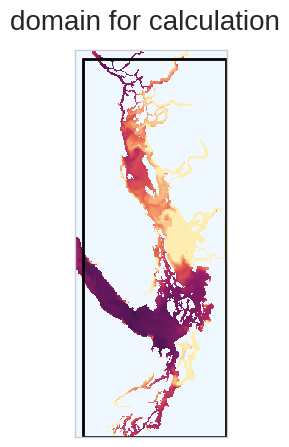

In [186]:
t_nc = nc.Dataset('/results2/SalishSea/nowcast-green.201806/01jan18/SalishSea_1h_20180101_20180101_carp_T.nc')
surfdat_1 = t_nc.variables['dissolved_inorganic_carbon'][0,0,:,:]

fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
cmap = cm.cm.matter
tplt = np.ma.masked_values(surfdat_1[:,:],0)
v_min = 2000
v_max = 2000

viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=1800, vmax=2200)


pat = patches.Rectangle((20,0),398-20,898-20,linewidth=2,edgecolor='k',facecolor='none')
ax.add_patch(pat)

plt.xticks([])
plt.yticks([])

cmap.set_bad('aliceblue')
plt.suptitle('domain for calculation',fontsize=20)


In [187]:
stor_mol_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol']
stor_mol_surf_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_surf']
stor_mol_20_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_20']
stor_mol_20_100_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_20_100']
stor_mol_deep_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_deep']
stor_flx_PI_15_3 = PI_2015_3_nc['model_output']['stor_flx']
stor_trans_JDF_PI_15_3 = PI_2015_3_nc['model_output']['stor_trans_JDF']
stor_trans_JS_PI_15_3 = PI_2015_3_nc['model_output']['stor_trans_JS']

stor_mol_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol']
stor_mol_surf_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_surf']
stor_mol_20_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_20']
stor_mol_20_100_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_20_100']
stor_mol_deep_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_deep']
stor_flx_BR_15_2 = BR_2015_2_nc['model_output']['stor_flx']
stor_trans_JDF_BR_15_2 = BR_2015_2_nc['model_output']['stor_trans_JDF']
stor_trans_JS_BR_15_2 = BR_2015_2_nc['model_output']['stor_trans_JS']

stor_mol_PI_ACBC_15_3 = PI_ACBC_2015_2_nc['model_output']['stor_mol']
stor_mol_surf_PI_ACBC_15_3 = PI_ACBC_2015_2_nc['model_output']['stor_mol_surf']
stor_mol_20_PI_ACBC_15_3 = PI_ACBC_2015_2_nc['model_output']['stor_mol_20']
stor_mol_20_100_PI_ACBC_15_3 = PI_ACBC_2015_2_nc['model_output']['stor_mol_20_100']
stor_mol_deep_PI_ACBC_15_3 = PI_ACBC_2015_2_nc['model_output']['stor_mol_deep']
stor_flx_PI_ACBC_15_3 = PI_ACBC_2015_2_nc['model_output']['stor_flx']
stor_trans_JDF_PI_ACBC_15_3 = PI_ACBC_2015_2_nc['model_output']['stor_trans_JDF']
stor_trans_JS_PI_ACBC_15_3 = PI_ACBC_2015_2_nc['model_output']['stor_trans_JS']

days_in = np.arange(0,np.size(stor_mol_PI_15_3),1)

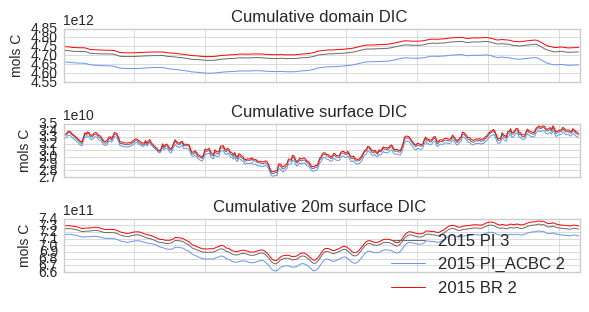

In [188]:
figstring = 'this'
fact = 0.6
fig = plt.figure(figsize=(10*fact,5*fact))

ax = fig.add_subplot(3,1,1)
ax.plot(days_in,stor_mol_PI_15_3,color = 'dimgrey',label = '2015 PI 3', linewidth = 0.7)
ax.plot(days_in,stor_mol_PI_ACBC_15_3,color = 'cornflowerblue',label = '2015 PI_ACBC 2', linewidth = 0.7)

ax.plot(days_in,stor_mol_BR_15_2,color = 'red',label = '2015 BR 2', linewidth = 0.7)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC ')

ax = fig.add_subplot(3,1,2)
ax.plot(days_in,stor_mol_surf_PI_15_3,color = 'dimgrey',label = '2015 PI 3', linewidth = 0.7)
ax.plot(days_in,stor_mol_surf_PI_ACBC_15_3,color = 'cornflowerblue',label = '2015 PI_ACBC 2', linewidth = 0.7)
ax.plot(days_in,stor_mol_surf_BR_15_2,color = 'red',label = '2015 BR 2', linewidth = 0.7)
#ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.xlim([0,365])
plt.title('Cumulative surface DIC ')

ax = fig.add_subplot(3,1,3)
ax.plot(days_in,stor_mol_20_PI_15_3,color = 'dimgrey',label = '2015 PI 3', linewidth = 0.7)
ax.plot(days_in,stor_mol_20_PI_ACBC_15_3,color = 'cornflowerblue',label = '2015 PI_ACBC 2', linewidth = 0.7)

ax.plot(days_in,stor_mol_20_BR_15_2,color = 'red',label = '2015 BR 2', linewidth = 0.7)
ax.legend(loc = 'best')
ax.set_ylabel('mols C')
plt.xlim([0,365])
ax.set_xticklabels([])
plt.title('Cumulative 20m surface DIC ')
 

plt.tight_layout()


In [189]:
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
t_mask = grid['tmask']
vdir = grid['e2t'][0,0:878,20:398]
udir = grid['e1t'][0,0:878,20:398]
wdir = grid['e3t_0'][0,:,0:878,20:398]* t_mask[0,:,0:878,20:398]

wdir_20 = grid['e3t_0'][0,0:20,0:878,20:398] * t_mask[0,0:20,0:878,20:398]
wdir_20_100 = grid['e3t_0'][0,20:27,0:878,20:398]* t_mask[0,20:27,0:878,20:398]
wdir_deep = grid['e3t_0'][0,27:40,0:878,20:398]* t_mask[0,27:40,0:878,20:398]
surfa = vdir*udir
surfa_mask = vdir*udir*t_mask[0,0,0:878,20:398]

In [190]:
t_mask = grid['tmask']


In [191]:
wdir_deep_0 = grid['e3t_0'][0,27:40,0,0]


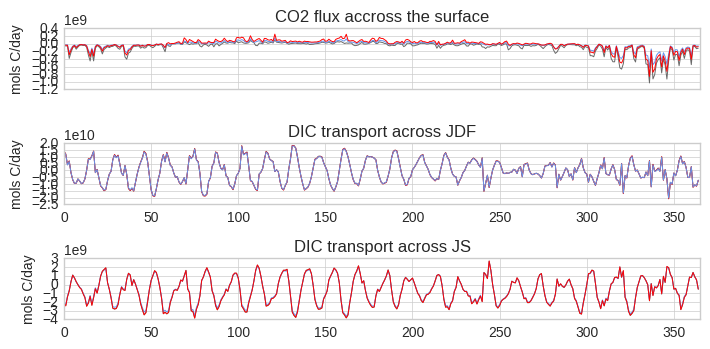

In [192]:
figstring = 'this'
fig = plt.figure(figsize=(10*0.72,5*0.72))

ax = fig.add_subplot(3,1,1)
ax.plot(days_in,stor_flx_PI_15_3,color = 'dimgrey',label = '2015 PI 3', linewidth = 0.7)
ax.plot(days_in,stor_flx_PI_ACBC_15_3,color = 'cornflowerblue',label = '2015 PI_ACBC 2', linewidth = 0.7)
ax.plot(days_in,stor_flx_BR_15_2,color = 'red',label = '2015 BR 2', linewidth = 0.7)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

ax = fig.add_subplot(3,1,2)
ax.plot(days_in,stor_trans_JDF_PI_15_3,color = 'dimgrey',label = '2015 PI 3', linewidth = 0.7)
ax.plot(days_in,stor_trans_JDF_BR_15_2,color = 'red',label = '2015 BR 2', linewidth = 0.7)
ax.plot(days_in,stor_trans_JDF_PI_ACBC_15_3,color = 'cornflowerblue',label = '2015 PI_ACBC 2', linewidth = 0.7)

plt.xlim([0,365])
#ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JDF')


ax = fig.add_subplot(3,1,3)

plt.xlim([0,365])
ax.plot(days_in,stor_trans_JS_PI_15_3,color = 'dimgrey',label = '2015 PI 3', linewidth = 0.7)
ax.plot(days_in,stor_trans_JS_PI_ACBC_15_3,color = 'cornflowerblue',label = '2015 PI_ACBC 2', linewidth = 0.7)
ax.plot(days_in,stor_trans_JS_BR_15_2,color = 'red',label = '2015 BR 2', linewidth = 0.7)
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JS')
plt.tight_layout()

In [193]:
print('2015 PI outgassing days', 365-np.size(np.where(stor_flx_PI_15_3[:] >0)))
print('2015 PI_ACBC outgassing days', 365-np.size(np.where(stor_flx_PI_ACBC_15_3[:] >0)))

print('2015 BR outgassing days', 365-np.size(np.where(stor_flx_BR_15_2[:] >0)))

2015 PI outgassing days 276
2015 PI_ACBC outgassing days 210
2015 BR outgassing days 177


In [194]:
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
vdir = grid['e2t'][0,0:878,20:398]
udir = grid['e1t'][0,0:878,20:398]
wdir = grid['e3t_0'][0,:,0:878,20:398]
wdir_20 = grid['e3t_0'][0,0:20,0:878,20:398]
wdir_20_100 = grid['e3t_0'][0,20:27,0:878,20:398]
wdir_deep = grid['e3t_0'][0,27:40,0:878,20:398]
surfa = vdir*udir

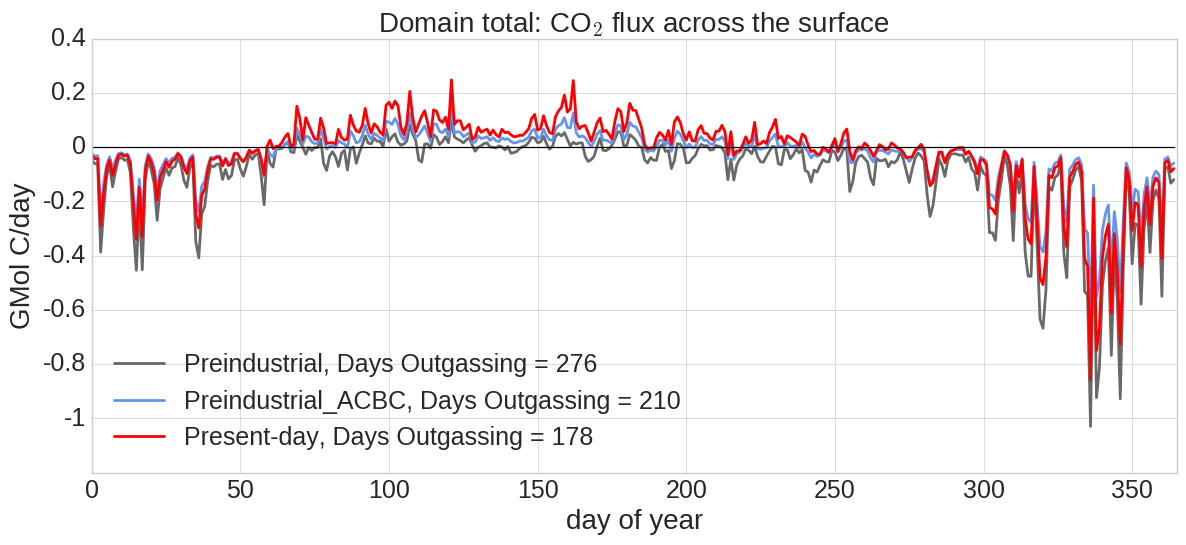

In [195]:
fig = plt.figure(figsize=(10*1.4,4*1.4))

 
ax = fig.add_subplot(1,1,1)

ax.plot(days_in,stor_flx_PI_15_3[:]/1e9,color = 'dimgrey',label = 'Preindustrial, Days Outgassing = 276', linewidth = 2)
ax.plot(days_in,stor_flx_PI_ACBC_15_3[:]/1e9,color = 'cornflowerblue',label = 'Preindustrial_ACBC, Days Outgassing = 210', linewidth = 2)

ax.plot(days_in,stor_flx_BR_15_2[:]/1e9,color = 'red',label = 'Present-day, Days Outgassing = 178', linewidth = 2)
ax.plot(days_in, np.zeros_like(days_in), color = 'k', linewidth = 0.9)
plt.xlim([0,365])
ax.legend(loc = 'best', fontsize = 18)
xtl = np.arange(0,400,50)
ytl = [-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4]
ax.set_ylim([-1.2,0.4])
ax.set_yticklabels(ytl, fontsize = 18)
ax.set_xticklabels(xtl, fontsize = 18)
ax.set_ylabel('GMol C/day', fontsize = 20)
ax.set_xlabel('day of year', fontsize = 20)
plt.title('Domain total: CO$_2$ flux across the surface', fontsize = 20)

In [196]:
river_load15 = np.float32(1.6911e11)
river_load16 = np.float32(1.6795e11)

EOY_BR2015_2 = np.sum(stor_mol_BR_15_2[np.size(stor_mol_BR_15_2)-1])
BR2015_2_change = (stor_mol_BR_15_2[np.size(stor_mol_BR_15_2)-1]-(stor_mol_BR_15_2[0]))
FLUX_BR2015_2 = np.sum(stor_flx_BR_15_2)
JDFTRANS_BR2015_2 = np.sum(stor_trans_JDF_BR_15_2)
JSTRANS_BR2015_2 = -np.sum(stor_trans_JS_BR_15_2)
blackbox_BR_15_2 = (BR2015_2_change - (FLUX_BR2015_2 + JDFTRANS_BR2015_2 + JSTRANS_BR2015_2 + river_load15))

EOY_PI2015_3 = np.sum(stor_mol_PI_15_3[np.size(stor_mol_PI_15_3)-1])
PI2015_3_change = (stor_mol_PI_15_3[np.size(stor_mol_PI_15_3)-1]-(stor_mol_PI_15_3[0]))
FLUX_PI2015_3 = np.sum(stor_flx_PI_15_3)
JDFTRANS_PI2015_3 = np.sum(stor_trans_JDF_PI_15_3)
JSTRANS_PI2015_3 = -np.sum(stor_trans_JS_PI_15_3)
blackbox_PI_15_3 = (PI2015_3_change - (FLUX_PI2015_3 + JDFTRANS_PI2015_3 + JSTRANS_PI2015_3 + river_load16))

EOY_PI_ACBC2015_3 = np.sum(stor_mol_PI_ACBC_15_3[np.size(stor_mol_PI_ACBC_15_3)-1])
PI_ACBC2015_3_change = (stor_mol_PI_ACBC_15_3[np.size(stor_mol_PI_ACBC_15_3)-1]-(stor_mol_PI_ACBC_15_3[0]))
FLUX_PI_ACBC2015_3 = np.sum(stor_flx_PI_ACBC_15_3)
JDFTRANS_PI_ACBC2015_3 = np.sum(stor_trans_JDF_PI_ACBC_15_3)
JSTRANS_PI_ACBC2015_3 = -np.sum(stor_trans_JS_PI_ACBC_15_3)
blackbox_PI_ACBC_15_3 = (PI_ACBC2015_3_change - (FLUX_PI_ACBC2015_3 + JDFTRANS_PI_ACBC2015_3 + JSTRANS_PI_ACBC2015_3 + river_load16))


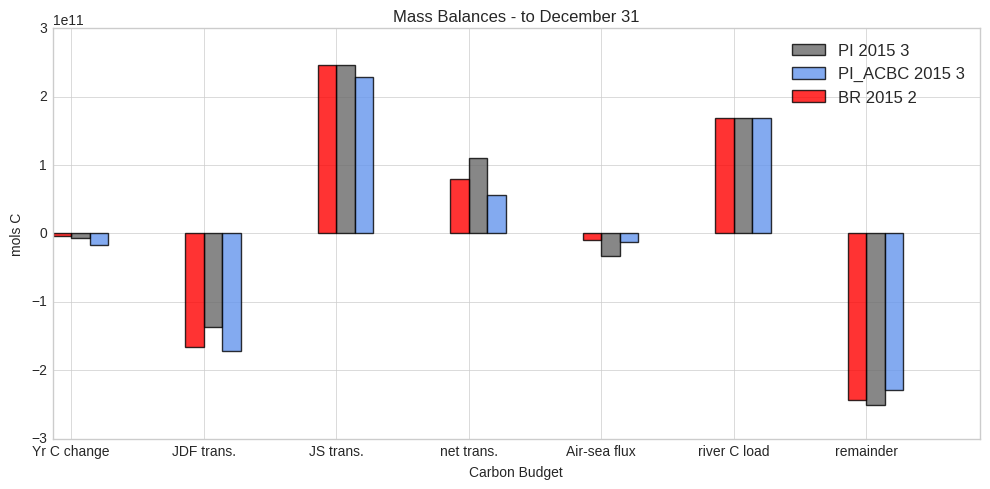

In [197]:
# data to plot
n_groups = 7
PI15_3_stats = (PI2015_3_change, JDFTRANS_PI2015_3, JSTRANS_PI2015_3, JSTRANS_PI2015_3 + JDFTRANS_PI2015_3,  FLUX_PI2015_3, river_load15, blackbox_PI_15_3)
BR15_2_stats = (BR2015_2_change, JDFTRANS_BR2015_2, JSTRANS_BR2015_2, JSTRANS_BR2015_2 + JDFTRANS_BR2015_2,  FLUX_BR2015_2, river_load15, blackbox_BR_15_2)
PI_ACBC15_3_stats = (PI_ACBC2015_3_change, JDFTRANS_PI_ACBC2015_3, JSTRANS_PI_ACBC2015_3, JSTRANS_PI_ACBC2015_3 + JDFTRANS_PI_ACBC2015_3,  FLUX_PI_ACBC2015_3, river_load15, blackbox_PI_ACBC_15_3)

# create plot
fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.14
opacity = 0.8

rects3 = plt.bar(index + bar_width*1, PI15_3_stats, bar_width,
alpha=opacity,
color='dimgrey',
label='PI 2015 3')

rects3 = plt.bar(index + bar_width*2, PI_ACBC15_3_stats, bar_width,
alpha=opacity,
color='cornflowerblue',
label='PI_ACBC 2015 3')

rects5 = plt.bar(index + bar_width*0, BR15_2_stats, bar_width,
alpha=opacity,
color='red',
label='BR 2015 2')




plt.xlabel('Carbon Budget')
plt.ylabel('mols C')
plt.title('Mass Balances - to December 31')
plt.xticks(index + bar_width, ('Yr C change', 'JDF trans.', 'JS trans.', 'net trans.', 'Air-sea flux', 'river C load', 'remainder'))
plt.legend(loc = 'best')

plt.tight_layout()
plt.show()

In [198]:
## everything below domain_yearly_co2flux thing gets deleted rn,
#see original notebook if interested
#MASSBAL_FATE_anthropogenic_carbon_PI_BR_2015